In [1]:
# Basic imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.optimize as spo
import sys
from time import time
from sklearn.metrics import r2_score, median_absolute_error

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

sys.path.append('../../')

from utils import preprocessing as pp

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pwd

'/home/miguel/udacity/Machine Learning Nanodegree/projects/capstone/capstone/notebooks/dev'

In [3]:
# Getting the data
data_df = pd.read_pickle('../../data/data_train_val_df.pkl')

sys.path.append('../../')
import predictor.feature_extraction as fe

train_time = -1 # In real time days
base_days = 7 # In market days
step_days = 7 # market days
ahead_days = 1 # market days
today = data_df.index[-1] # Real date

tic = time()
x, y = fe.generate_train_intervals(data_df, 
                                   train_time, 
                                   base_days, 
                                   step_days, 
                                   ahead_days, 
                                   today, 
                                   fe.feature_close_one_to_one)
toc = time()
print('Elapsed time: %i seconds.' % (toc-tic))
print(data_df.shape)

Elapsed time: 219 seconds.
(5520, 2415)


### Get the results of a single run

In [4]:
from predictor import evaluation as ev
from predictor.dummy_mean_predictor import DummyPredictor

In [5]:
predictor = DummyPredictor()

In [6]:
y_train_true_df, y_train_pred_df, y_val_true_df, y_val_pred_df = ev.run_single_val(x, y, ahead_days, predictor)

In [7]:
print(y_train_true_df.shape)
print(y_train_pred_df.shape)
print(y_val_true_df.shape)
print(y_val_pred_df.shape)

(314255, 1)
(314255, 1)
(479, 1)
(479, 1)


In [8]:
y_train_true_df.head()

target
1993-01-29 AAL   1.053333
           ABBV  0.957547
           ABC   0.931298
           ADI   1.036919
           ADP   1.028852

In [9]:
y_train_pred_df.head()

target
1993-01-29 AAL   1.052267
           ABBV  0.995957
           ABC   0.990731
           ADI   1.040240
           ADP   1.015176

In [10]:
y_val_true_df.head()

target
2014-12-16 A     1.113194
           AAL   1.060000
           AAP   1.027382
           AAPL  1.039419
           ABBV  1.067922

In [11]:
y_val_pred_df.head()

target
2014-12-16 A     1.053735
           AAL   1.037143
           AAP   1.031242
           AAPL  1.030347
           ABBV  1.041342

### Done. Let's test the reshape_by_symbol function

In [12]:
y_train_true_rs = ev.reshape_by_symbol(y_train_true_df)
print(y_train_true_rs.shape)
y_train_true_rs.head()

(787, 481)


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,NaN,1.053333,NaN,NaN,0.957547,0.931298,NaN,NaN,NaN,1.036919,...,1.008403,1.024900,NaN,0.891759,NaN,NaN,NaN,NaN,1.056673,NaN
1993-02-09,NaN,1.120000,NaN,NaN,0.965517,1.024590,NaN,NaN,NaN,0.939780,...,0.959722,0.975705,NaN,0.931034,NaN,NaN,NaN,NaN,0.924740,NaN
1993-02-19,NaN,1.005877,NaN,NaN,0.989796,0.976000,NaN,NaN,NaN,1.011225,...,1.010854,1.044821,NaN,0.951111,NaN,NaN,NaN,NaN,1.075772,NaN
1993-03-02,NaN,1.067416,NaN,NaN,1.046392,1.000000,NaN,NaN,NaN,1.049491,...,1.005727,1.023832,NaN,1.168224,NaN,NaN,NaN,NaN,1.021739,NaN
1993-03-11,NaN,0.936842,NaN,NaN,0.935961,0.979508,NaN,NaN,NaN,0.969590,...,0.967260,1.015829,NaN,0.906667,NaN,NaN,NaN,NaN,1.021277,NaN


In [13]:
y_train_pred_rs = ev.reshape_by_symbol(y_train_pred_df)
print(y_train_pred_rs.shape)
y_train_pred_rs.head()

(787, 481)


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,NaN,1.052267,NaN,NaN,0.995957,0.990731,NaN,NaN,NaN,1.040240,...,0.996098,1.013517,NaN,0.970304,NaN,NaN,NaN,NaN,1.039697,NaN
1993-02-09,NaN,1.035298,NaN,NaN,0.962702,1.004684,NaN,NaN,NaN,0.979592,...,0.979365,0.978481,NaN,1.001576,NaN,NaN,NaN,NaN,0.965027,NaN
1993-02-19,NaN,0.984048,NaN,NaN,0.986880,0.961143,NaN,NaN,NaN,1.013631,...,0.991317,1.020774,NaN,0.962540,NaN,NaN,NaN,NaN,1.048243,NaN
1993-03-02,NaN,1.041669,NaN,NaN,1.022828,0.991218,NaN,NaN,NaN,1.033567,...,1.002045,1.007762,NaN,1.066533,NaN,NaN,NaN,NaN,0.981118,NaN
1993-03-11,NaN,0.985684,NaN,NaN,0.980999,0.995902,NaN,NaN,NaN,0.982182,...,0.984748,0.995211,NaN,1.005333,NaN,NaN,NaN,NaN,0.988571,NaN


In [14]:
y_val_true_rs = ev.reshape_by_symbol(y_val_true_df)
print(y_val_true_rs.shape)
y_val_true_rs.head()

(1, 479)


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2014-12-16,1.113194,1.06,1.027382,1.039419,1.067922,1.072425,1.019043,1.026513,1.101243,1.089899,...,1.059176,1.066287,1.044536,1.015849,1.07389,1.041146,1.059693,1.049453,1.068063,1.082007


### So, the reshape_by_symbol function seems to work with run_single_val. It could be added to it. Let's test the roll_evaluate function.

In [15]:
u = x.index.levels[0][0]
print(u)

1993-01-29 00:00:00


In [16]:
fe.SPY_DF.sort_index().index.unique()

DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=6024, freq=None)

In [17]:
md = fe.SPY_DF.index.unique()

In [18]:
u in md

True

In [19]:
fe.add_market_days(u,6)

Timestamp('1993-02-08 00:00:00')

## Let's do some previous filtering to avoid problems

In [20]:
# Getting the data
GOOD_DATA_RATIO = 0.99

data_df = pd.read_pickle('../../data/data_train_val_df.pkl')

sys.path.append('../../')
import predictor.feature_extraction as fe
import utils.preprocessing as pp

data_df = pp.drop_irrelevant_symbols(data_df, GOOD_DATA_RATIO)

train_time = -1 # In real time days
base_days = 7 # In market days
step_days = 7 # market days
ahead_days = 1 # market days
today = data_df.index[-1] # Real date

tic = time()
x, y = fe.generate_train_intervals(data_df, 
                                   train_time, 
                                   base_days, 
                                   step_days, 
                                   ahead_days, 
                                   today, 
                                   fe.feature_close_one_to_one)
toc = time()
print('Elapsed time: %i seconds.' % (toc-tic))

Elapsed time: 142 seconds.


In [21]:
print(data_df.shape)
data_df.head()

(5520, 1425)


feature     Close                                                           \
              SPY    MMM   ABT  ADBE    AMD   AES   AET   AFL    APD   ALK   
date                                                                         
1993-01-29  43.94  24.50  6.88  2.59  18.75  4.41  6.42  4.49  21.94  4.19   
1993-02-01  44.25  24.69  6.88  2.72  19.12  4.53  6.64  4.52  22.38  4.19   
1993-02-02  44.34  24.72  6.53  2.84  20.25  4.53  6.62  4.57  22.31  4.16   
1993-02-03  44.81  25.19  6.91  2.70  20.50  4.49  6.50  4.65  22.69  4.22   
1993-02-04  45.00  26.06  6.84  2.73  20.12  4.49  6.73  4.84  23.19  4.38   

feature       ...      Volume                                             \
              ...         HCN        WDC         WY       WHR        WFM   
date          ...                                                          
1993-01-29    ...     10600.0  1552200.0   805900.0  230300.0   268800.0   
1993-02-01    ...     11900.0   869600.0   647900.0  160200.0    14400.0   
1993-02-02    ...      9700.0  1149400.0  1189900.0  118100.0   163200.0   
1993-02-03    ...      5300.0   611000.0  1542300.0  246300.0   257600.0   
1993-02-04    ...     11700.0  1102800.0  1313800.0  354500.0  1473600.0   

feature                                                          
                  WMB       XEL        XRX       XLNX      ZION  
date                                                             
1993-01-29   732198.0   87800.0  7633602.0  1745196.0   33600.0  
1993-02-01   722598.0   72400.0  3001200.0  3574800.0   32000.0  
1993-02-02   808398.0  242200.0  1388598.0  2652396.0  251600.0  
1993-02-03  3141198.0  272200.0  1228200.0  5040396.0  254800.0  
1993-02-04  1550202.0  162800.0  1675602.0  7033200.0  317200.0  

[5 rows x 1425 columns]

In [22]:
SAMPLES_GOOD_DATA_RATIO = 0.9

x_y_df = pd.concat([x, y], axis=1)
x_y_df = pp.drop_irrelevant_samples(x_y_df, SAMPLES_GOOD_DATA_RATIO)
x = x_y_df.iloc[:, :-1]
y = x_y_df.iloc[:, -1]
x = pp.fill_missing(x)

In [23]:
x_y_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
target    0
dtype: int64

In [24]:
x.isnull().sum().sum()

0

In [25]:
y.isnull().sum()

0

In [26]:
x_reshaped = ev.reshape_by_symbol(x)
x_reshaped.head()

ticker,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEP,AES,AET,AFL,...,WHR,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,ZION
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.033253,0.996000,0.986667,1.007985,1.028796,1.018908,0.974581,1.055794,0.900369,1.079525
1993-02-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.003114,0.979253,1.054795,0.946756,0.990397,0.947917,1.031124,0.979633,0.948966,0.897924
1993-02-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.994302,1.032787,0.854737,1.072822,0.994396,0.998553,1.021422,0.955010,0.942222,1.070159
1993-03-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.046926,1.083636,1.059666,1.000000,0.990695,1.014316,0.982126,1.004283,1.168224,0.994783
1993-03-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.985308,0.900641,0.641553,1.000000,1.020202,0.977936,1.057585,0.985075,0.917333,1.005106


In [27]:
x_reshaped.isnull().sum().max()

6

In [28]:
x.shape

(224493, 7)

In [29]:
x_reshaped.shape

(788, 1995)

In [30]:
x_reshaped[x_reshaped.notnull()]

ticker,AAPL,ABT,ADBE,ADM,ADP,ADSK,AEP,AES,AET,AFL,...,WHR,WMB,WMT,WY,XEL,XLNX,XOM,XRAY,XRX,ZION
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.033253,0.996000,0.986667,1.007985,1.028796,1.018908,0.974581,1.055794,0.900369,1.079525
1993-02-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.003114,0.979253,1.054795,0.946756,0.990397,0.947917,1.031124,0.979633,0.948966,0.897924
1993-02-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.994302,1.032787,0.854737,1.072822,0.994396,0.998553,1.021422,0.955010,0.942222,1.070159
1993-03-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.046926,1.083636,1.059666,1.000000,0.990695,1.014316,0.982126,1.004283,1.168224,0.994783
1993-03-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.985308,0.900641,0.641553,1.000000,1.020202,0.977936,1.057585,0.985075,0.917333,1.005106
1993-03-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.945667,1.048148,1.067616,0.943030,1.024661,1.024283,0.953843,1.028017,1.097059,1.020833
1993-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.012121,0.971326,0.868327,0.909320,1.028433,0.955331,1.036399,0.975052,0.893531,1.005000
1993-04-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.070588,0.942446,1.056277,0.879333,0.969168,0.992492,1.026383,0.976596,0.940063,0.958541
1993-04-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.972527,0.985075,0.976000,1.005259,0.996377,0.950758,0.974447,1.006466,0.962843,0.944930


In [31]:
y_train_true_df, y_train_pred_df, y_val_true_df, y_val_pred_df = ev.run_single_val(x, y, ahead_days, predictor)

In [32]:
from sklearn.metrics import r2_score

r2_score(y_train_true_df, y_train_pred_df, multioutput='raw_values')

array([ 0.73157763])

In [33]:
tickers = y_train_true_df.index.levels[1]
tickers

Index(['AAPL', 'ABT', 'ADBE', 'ADM', 'ADP', 'ADSK', 'AEP', 'AES', 'AET', 'AFL',
       ...
       'WHR', 'WMB', 'WMT', 'WY', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'ZION'],
      dtype='object', length=285)

In [34]:
y_train_true_df.loc[(slice(None), 'AAPL'),:]

,,target
1993-01-29,AAPL,1.036919
1993-02-09,AAPL,0.939780
1993-02-19,AAPL,1.011225
1993-03-02,AAPL,1.049491
1993-03-11,AAPL,0.969590
1993-03-22,AAPL,1.002727
1993-03-31,AAPL,0.960562
1993-04-12,AAPL,1.005663
1993-04-21,AAPL,1.026748
1993-04-30,AAPL,0.988117


In [35]:
from sklearn.metrics import r2_score

r2_train_score = []
mre_train = []

for ticker in tickers:
    y_true = y_train_true_df.loc[(slice(None), ticker),:]
    y_pred = y_train_pred_df.loc[(slice(None), ticker),:]
    r2_train_score.append(r2_score(y_true, y_pred))
    mre_train.append(ev.mre(y_true, y_pred))

In [36]:
np.mean(r2_train_score)

0.60287214336744199

In [37]:
np.mean(mre_train)

0.026022401874542932

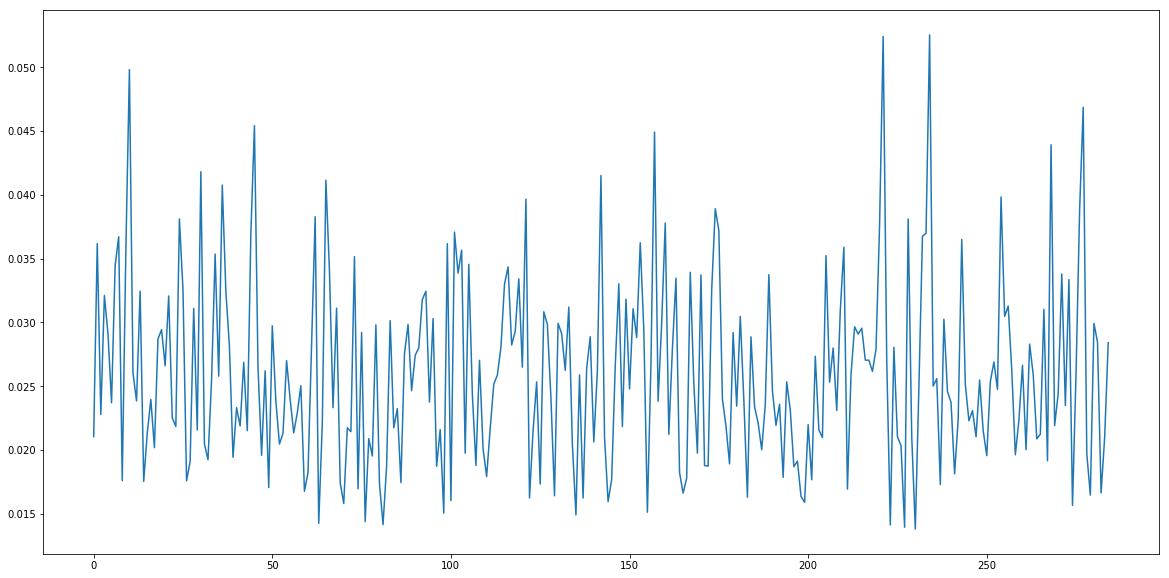

In [38]:
plt.plot(mre_train)

In [39]:
ev.get_metrics(y_train_true_df, y_train_pred_df)

(array([ 0.53163755,  0.61446681,  0.54795441,  0.57988322,  0.57775562,
         0.54613065,  0.58602703,  0.57462863,  0.56012081,  0.62390457,
         0.5833973 ,  0.5859081 ,  0.58444796,  0.4910911 ,  0.56606776,
         0.57371896,  0.62115726,  0.56395699,  0.58968238,  0.56560327,
         0.60334786,  0.6975632 ,  0.59351298,  0.57957136,  0.55453511,
         0.57435643,  0.60134359,  0.55067472,  0.58292719,  0.6072723 ,
         0.55738435,  0.57462029,  0.58820027,  0.57658545,  0.58354568,
         0.584754  ,  0.58767559,  0.57174888,  0.54343198,  0.55708148,
         0.55736886,  0.57172717,  0.49663157,  0.59186716,  0.58125822,
         0.55474667,  0.61096791,  0.55602571,  0.5876517 ,  0.60725788,
         0.59261264,  0.60698156,  0.59802453,  0.5763734 ,  0.62418084,
         0.5900951 ,  0.55485529,  0.54924374,  0.58126517,  0.59020333,
         0.58359796,  0.59109785,  0.60700965,  0.55130355,  0.57710149,
         0.62808651,  0.66389166,  0.56682787,  0.5

In [41]:
train_days = 252
x_y_sorted = pd.concat([x, y], axis=1).sort_index()
start_date = x_y_sorted.index.levels[0][0]
end_date = fe.add_market_days(start_date, train_days)

In [42]:
start_date

Timestamp('1993-01-29 00:00:00')

In [43]:
end_date

Timestamp('1994-01-27 00:00:00')

In [44]:
start_date + ((end_date - start_date) / 2)

Timestamp('1993-07-29 12:00:00')

In [45]:
train_days = 252
step_eval_days = 30
r2, mre, y_val_true_df, y_val_pred_df, mean_dates = ev.roll_evaluate(x, 
                                                                     y, 
                                                                     train_days, 
                                                                     step_eval_days, 
                                                                     ahead_days, 
                                                                     predictor, 
                                                                     verbose=True)

Evaluating approximately 175 training/evaluation pairs
Approximately 100.6 percent complete.    

In [46]:
print(r2.shape)
print(mre.shape)
print(y_val_true_df.shape)
print(y_val_pred_df.shape)
print(mean_dates.shape)

(176, 2)
(176, 2)
(50160, 1)
(50160, 1)
(176,)


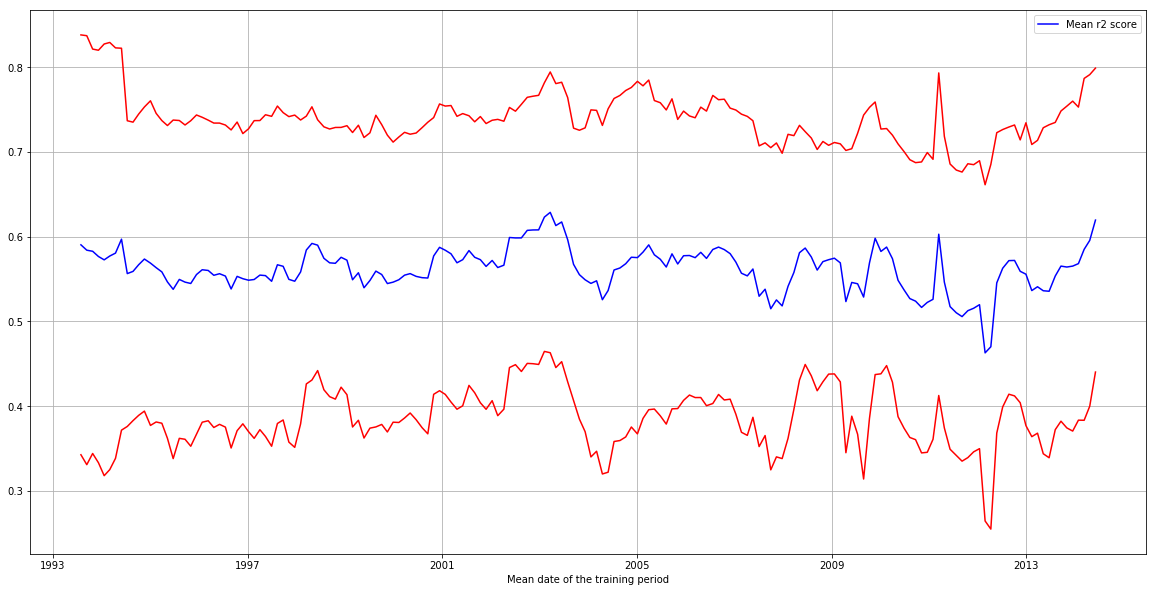

In [47]:
plt.plot(mean_dates, r2[:, 0], 'b', label='Mean r2 score')
plt.plot(mean_dates, r2[:, 0] + 2*r2[:, 1], 'r')
plt.plot(mean_dates, r2[:, 0] - 2*r2[:, 1], 'r')
plt.xlabel('Mean date of the training period')
plt.legend()
plt.grid()

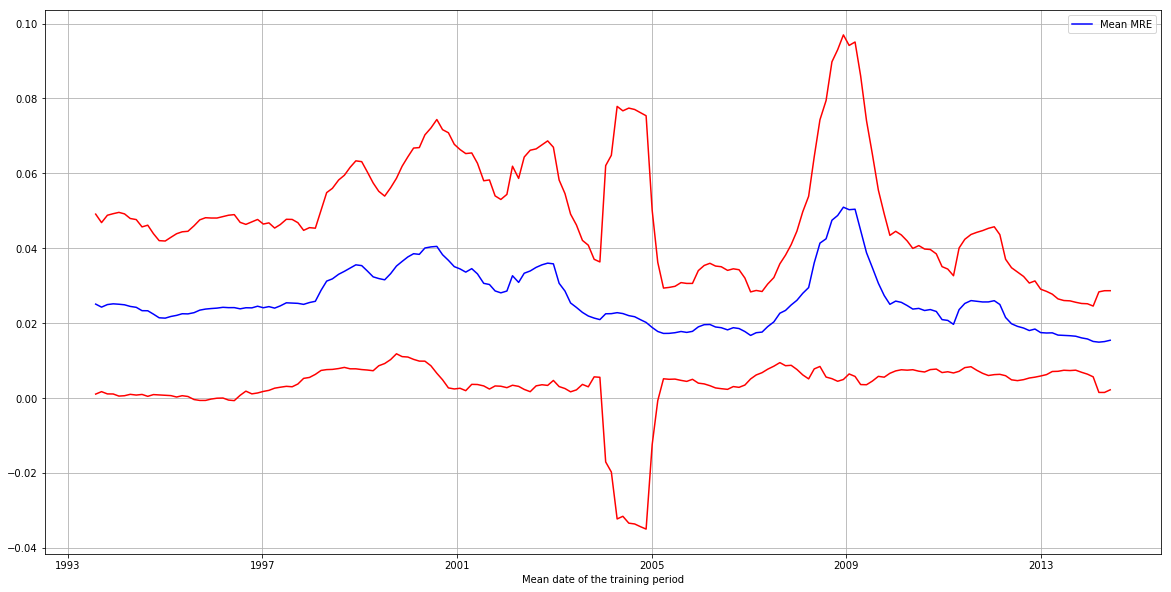

In [48]:
plt.plot(mean_dates, mre[:, 0], 'b', label='Mean MRE')
plt.plot(mean_dates, mre[:, 0] + 2*mre[:, 1], 'r')
plt.plot(mean_dates, mre[:, 0] - 2*mre[:, 1], 'r')
plt.xlabel('Mean date of the training period')
plt.legend()
plt.grid()

In [49]:
y_val_true_df.head()

target
1994-01-27 AAPL  0.987248
           ABT   0.925926
           ADBE  0.967742
           ADM   1.021264
           ADP   0.989575

In [50]:
y_val_pred_df.head()

target
1994-01-27 AAPL  1.005230
           ABT   0.974301
           ADBE  0.985348
           ADM   1.018450
           ADP   1.004582

In [51]:
r2_scores, mre_scores, tickers = ev.get_metrics(y_val_true_df, y_val_pred_df)

In [52]:
eval_df = pd.DataFrame(np.array([r2_scores, mre_scores]).T, index=tickers, columns=['r2', 'mre'])
eval_df.head()

,r2,mre
AAPL,0.572033,0.022587
ABT,0.625334,0.035379
ADBE,0.481490,0.023023
ADM,0.483938,0.038699
ADP,0.527400,0.029104


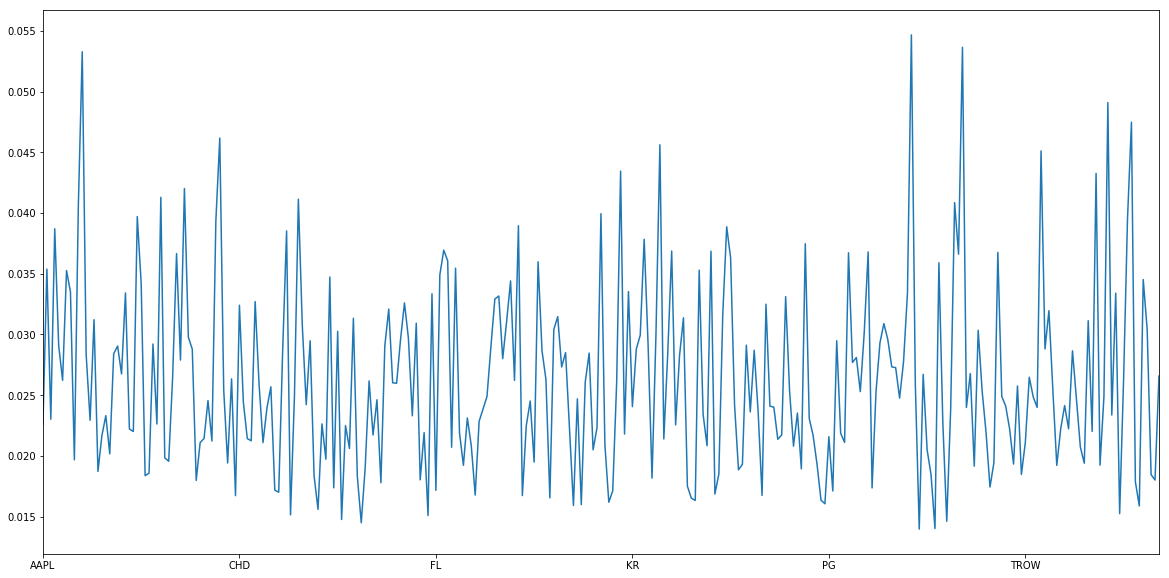

In [53]:
eval_df['mre'].plot()

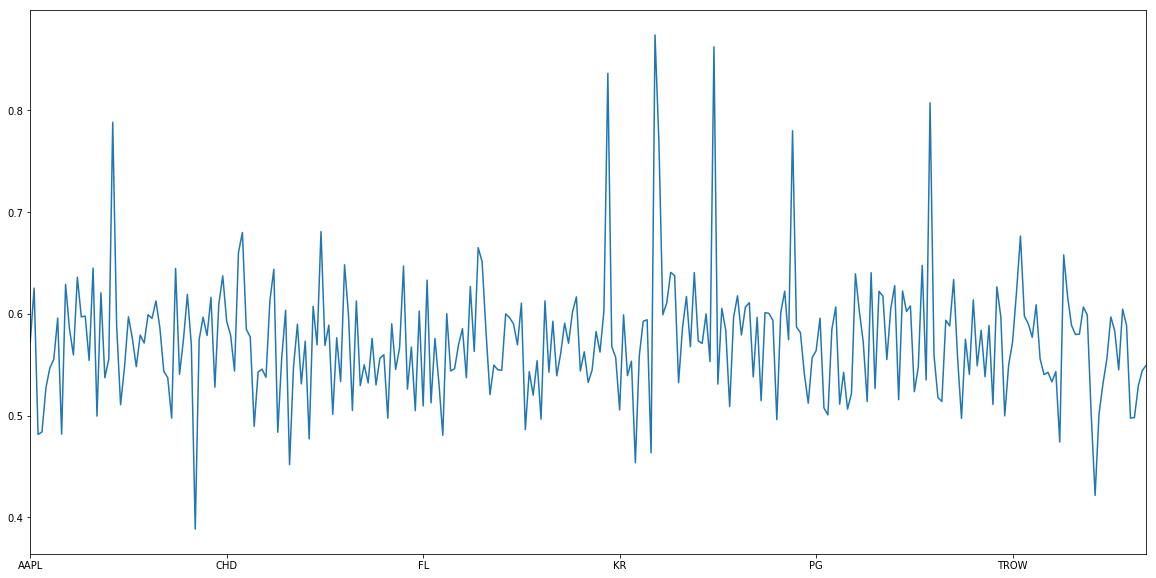

In [54]:
eval_df['r2'].plot()

In [55]:
eval_df.sort_values(by='mre', ascending=False)

,r2,mre
RRC,0.515626,0.054660
STI,0.588144,0.053640
AIG,0.585085,0.053273
WDC,0.421499,0.049088
WMT,0.544983,0.047475
CAT,0.578722,0.046168
LLY,0.594250,0.045613
TSS,0.590237,0.045110
KLAC,0.836497,0.043445
VNO,0.606729,0.043260


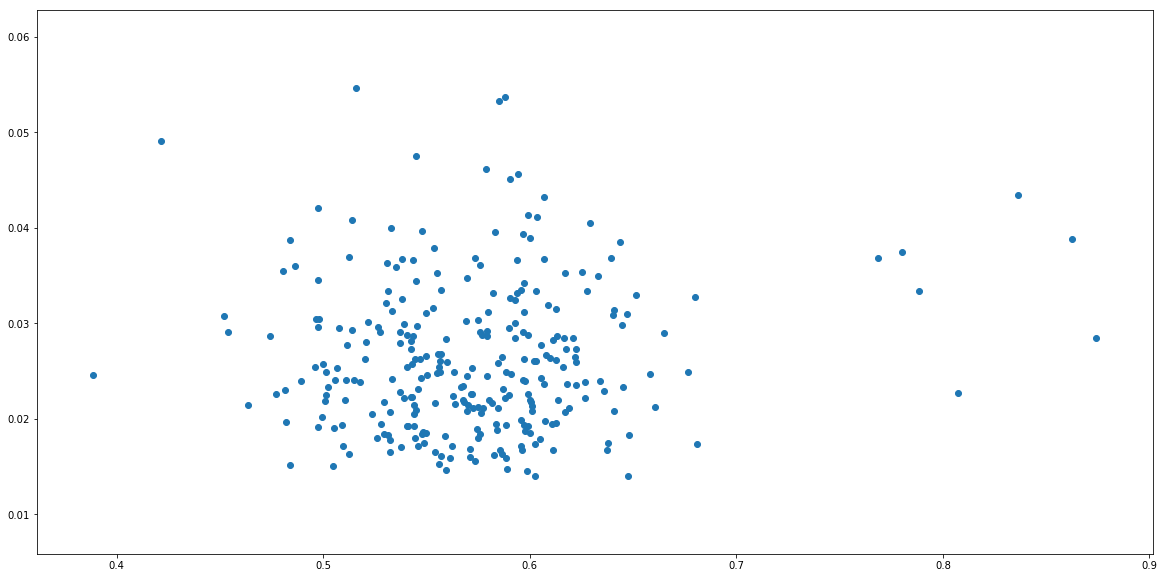

In [56]:
plt.scatter(eval_df['r2'], eval_df['mre'])

In [57]:
eval2_df = ev.get_metrics_df(y_val_true_df, y_val_pred_df)

In [58]:
eval2_df.head()

,r2,mre
AAPL,0.572033,0.022587
ABT,0.625334,0.035379
ADBE,0.481490,0.023023
ADM,0.483938,0.038699
ADP,0.527400,0.029104
